<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Защита персональных данных клиентов

Нужно разработать такой метод преобразования данных клиентов страховой компании, чтобы по ним было сложно восстановить персональную информацию, и обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Преобразуем возраст и зарплату в целочисленный тип данных

In [5]:
df[['Возраст', 'Зарплата']] = df[['Возраст', 'Зарплата']].astype(int)

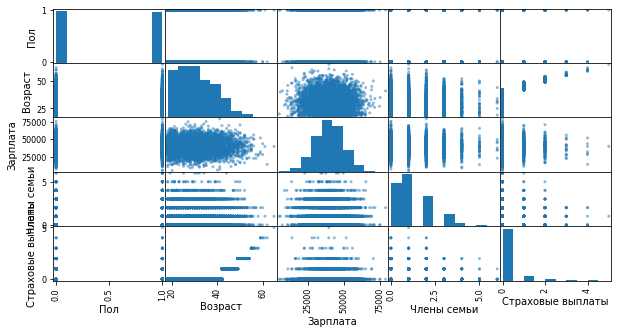

In [6]:
pd.plotting.scatter_matrix(df, figsize=(10, 5))
plt.show()

**Из диаграмм видно, что зарплата имеет распределение, близкое к нормальному, а возраст, количество членов семьи и количество страховых выплат смещены в сторону меньших показателей. Можно отметить прямую зависимость целевого признака от возраста и обратную - от количества членов семьи.**

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ: Качество линейной регрессии не изменится** 

**Обоснование ниже:**

Умножим матрицу признаков на обратимую матрицу $A$

Тогда полученная матрица признаков будет равна: $X_A = XA$

Формула обучения также изменится: $w_A = ((XA)^T XA)^{-1} (XA)^T y$

Предсказания новой матрицы признаков: $a_A = XA((XA)^T XA)^{-1} (XA)^T y$

Преобразуем это выражение. Траспонированное произведение матриц равно произведению транспонированных матриц в обратном порядке:

$XA((XA)^T XA)^{-1} (XA)^T y = XA(A^T X^T XA)^{-1}A^T X^T y$

Разложим обратную матрицу произведения $(A^T X^T XA)^{-1}$ на произведение обратных матриц. Квадратные матрицы-множители в нем - это $A^T$, $X^T X$ и $A$:

$XA(A^T X^T XA)^{-1}A^T X^T y = XA A^{-1} (X^T X)^{-1} {A^T}^{-1} A^T X^T y$

Матрица $A$ - обратимая, это значит, что $A A^{-1} = E$ и ${A^T}^{-1} A^T = E$

Тогда выражение примет вид:

$XA A^{-1} (X^T X)^{-1} {A^T}^{-1} A^T X^T y = XE (X^T X)^{-1} E X^T y$

Произведение матрицы на единичную матрицу $E$ не изменяет матрицу. Сократим $E$:

$XE (X^T X)^{-1} E X^T y = X (X^T X)^{-1}X^T y$

Выражение $(X^T X)^{-1}X^T y$ - это изначальная формула обучения линейной регрессии. Тогда:

$X (X^T X)^{-1}X^T y = Xw = a$

Таким образом, мы получили равенство предсказаний исходных признаков и предсказаний признаков, умноженных на обратимую матрицу:

$$a = a_A$$


## Алгоритм преобразования

**Алгоритм**
Для проверки неизменности результатов линейной регрессии умножим матрицу признаков на случайную обратимую матрицу. Затем обучим модель на исходных признаках и измененных и сравним результаты.


**Обоснование**
Если доказательство о неизменности результатов линейной регрессии верно, то качество модели на исходных данных и преобразованных будет одинаковым.

## Проверка алгоритма

Выделим обучающие и целевой признаки их исходного датасета.

In [7]:
features = df.drop(['Страховые выплаты'], axis=1)
target = df['Страховые выплаты']

Умножим признаки на обратимую матрицу. Для умножения высота матрицы должна равняться ширине матрицы признаков. Так как матрица обратимая, то ее высота будет равняться ширине. Матрица может оказаться необратимой, в таком случае нужно будет создать ее повторно. Напишем функцию генерирования случайной матрицы, которая будет выполняться до тех пор, пока не сгенерируется обратимая матрица. 

In [8]:
def generate_matrix():
    matrix = []
    for i in range(features.shape[1]):
        matrix.append(np.random.normal(size=features.shape[1]))
    matrix = np.array(matrix)
    _ = np.linalg.inv(matrix) #Если матрица необратимая, то в этом месте выйдет ошибка
    return matrix
try:
    matrix = generate_matrix()
except:
    matrix = generate_matrix()

In [9]:
matrix

array([[ 0.1510368 , -2.08327527, -1.5132041 , -1.02436857],
       [ 0.44602319, -0.08021578, -0.45103156, -0.26673783],
       [-1.05950008, -0.32549067, -1.62644539,  0.26743484],
       [-0.6090548 ,  1.80296189,  0.45279413, -0.12853901]])

Умножим признаки на обратимую матрицу

In [10]:
features_encrypt = pd.DataFrame(features.values @ matrix, columns=features.columns)

In [11]:
features_encrypt

,Пол,Возраст,Зарплата,Члены семьи
0,-52533.375173,-16147.906169,-80691.243871,13252.678845
1,-40241.095133,-12370.532253,-61825.219342,10150.125395
2,-22236.567066,-6837.630233,-34168.433031,5608.396217
3,-44173.005074,-13571.039359,-67831.338689,11146.174205
4,-27640.312474,-8499.635686,-42464.366674,6971.556264
...,...,...,...,...
4995,-37812.882415,-11618.656876,-58075.823591,9539.698007
4996,-55503.248603,-17056.635246,-85240.620528,14004.387927
4997,-35909.350452,-11032.131952,-55144.613643,9060.449200
4998,-34637.516324,-10641.983898,-53194.841653,8737.841010


Поделим фичи (до и после шифрования) и целевой признак на обучающую и тестовую выборки

In [12]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)
features_train_encrypt, features_test_encrypt, target_train, target_test = train_test_split(
    features_encrypt, target, test_size=0.2, random_state=0)

Теперь обучим модель линейной регрессии на обучающей выборке до и после шифрования, посчитаем качество модели на тестовой выборке и сравним результаты.

In [13]:
model = LinearRegression()
model.fit(features_train, target_train)
test_predict = model.predict(features_test)
R2_score = r2_score(target_test, test_predict)
model.fit(features_train_encrypt, target_train)
test_predict = model.predict(features_test_encrypt)
R2_score_encrypt = r2_score(target_test, test_predict)

In [14]:
print('Значение R2 на тестовой выборке для модели, обученной на выборке до шифрования, составляет', R2_score)
print('Значение R2 на тестовой выборке для модели, обученной на выборке после шифрования, составляет', R2_score_encrypt)
print('Разница полученных результатов', R2_score - R2_score_encrypt)

Значение R2 на тестовой выборке для модели, обученной на выборке до шифрования, составляет 0.39753943113559864
Значение R2 на тестовой выборке для модели, обученной на выборке после шифрования, составляет 0.3975394311356272
Разница полученных результатов -2.853273173286652e-14


**Как видно, качество модели до и после шифрования практически идентичное.**

## Выводы

**В проекте аналитическим методом была доказана неизменность качества линейной регрессии при умножении признаков на обратимую матрицу. Теория также подтверждена на реальной линейной модели путем сравнения результатов ее предсказания до и после умножения признаков на обратимую матрицу.**